In [3]:
!git clone https://github.com/Sarcast1c/TREE-SPECIES-CLASSIFICATION.git

fatal: destination path 'TREE-SPECIES-CLASSIFICATION' already exists and is not an empty directory.


In [7]:
import os

Repo_path = os.path.join("TREE-SPECIES-CLASSIFICATION", "Tree_Species_Dataset")
print("Files in Tree_Species_Dataset:", os.listdir(Repo_path))

Files in Tree_Species_Dataset: ['mango', 'nilgiri', 'amla', 'khajur', 'banyan', 'sitafal', 'motichanoti', 'champa', 'saptaparni', 'pilikaren', 'gunda', 'cactus', 'coconut', 'gulmohor', 'bili', 'vad', 'simlo', 'asopalav', 'jamun', 'sugarcane', 'garmalo', 'kesudo', 'neem', 'shirish', 'babul', 'sonmahor', 'bamboo', 'other', 'kanchan', 'pipal']


In [8]:
class_dirs = os.listdir(Repo_path)
print(f"Number of classes: {len(class_dirs)}")

Number of classes: 30


In [10]:
import glob
import os

image_paths = []
labels = []

for class_name in os.listdir(Repo_path):
    class_folder = os.path.join(Repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            # Assuming image files have extensions like .jpg, .jpeg, .png, etc.
            # You might want to add more extensions or a more robust check
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
                image_paths.append(os.path.join(class_folder, img_file))
                labels.append(class_name)

print(f"Total images: {len(image_paths)}")

Total images: 1600


In [12]:
import pandas as pd
import os

class_counts = {cls: len(os.listdir(os.path.join(Repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("shape: ",class_counts_df.shape)

        Image Count
other           150
mango            50
amla             50
khajur           50
banyan           50
shape:  (30, 1)


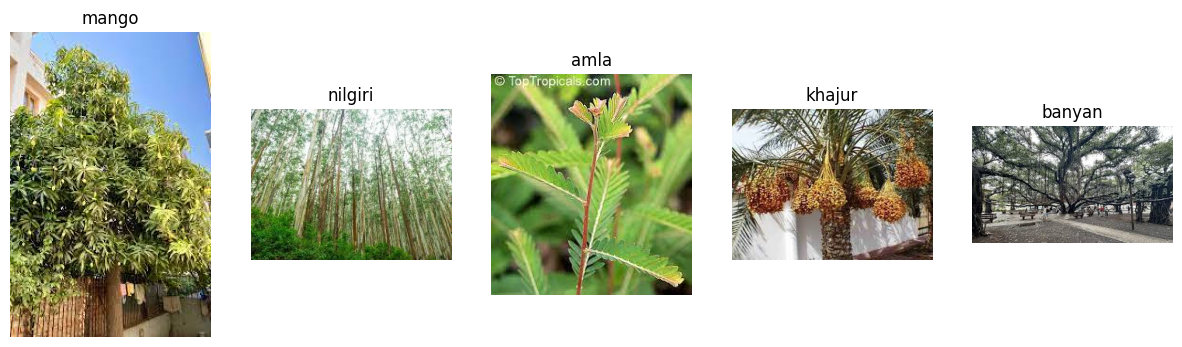

In [14]:
import matplotlib.pyplot as plt
from PIL import Image
import os

def show_sample_images(Repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        # Construct the path to the class folder within the dataset
        class_folder_path = os.path.join(Repo_path, class_dir)
        # List files in the class folder and get the first image file
        img_files = [f for f in os.listdir(class_folder_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]
        if img_files:
            img_path = os.path.join(class_folder_path, img_files[0])
            img = Image.open(img_path)
            plt.subplot(1, n, i+1)
            plt.imshow(img)
            plt.title(class_dir)
            plt.axis('off')
        else:
            print(f"No image files found in {class_folder_path}")
    plt.show()

show_sample_images(Repo_path, class_dirs)

In [15]:
image_shapes = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(Repo_path, class_dir)):
        img_path = os.path.join(Repo_path, class_dir, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)

# DataFrame and Summary
import pandas as pd

shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
shapes_df.head()

,Width,Height
0,182,277
1,539,360
2,194,259
3,259,194
4,375,500


In [16]:

print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [17]:
import hashlib
from collections import defaultdict
import os

hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(Repo_path, class_dir)):
        img_path = os.path.join(Repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("Duplicate image sets found:", len(duplicates))

Duplicate image sets found: 82


In [18]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(Repo_path, class_dir)):
        img_path = os.path.join(Repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 0


Duplicate set 1:


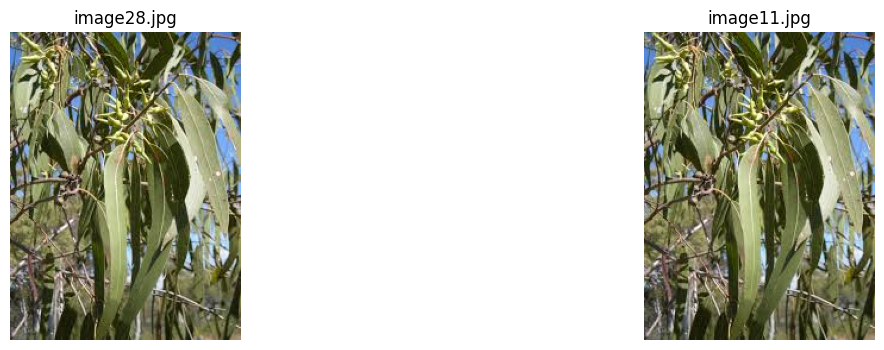

Duplicate set 2:


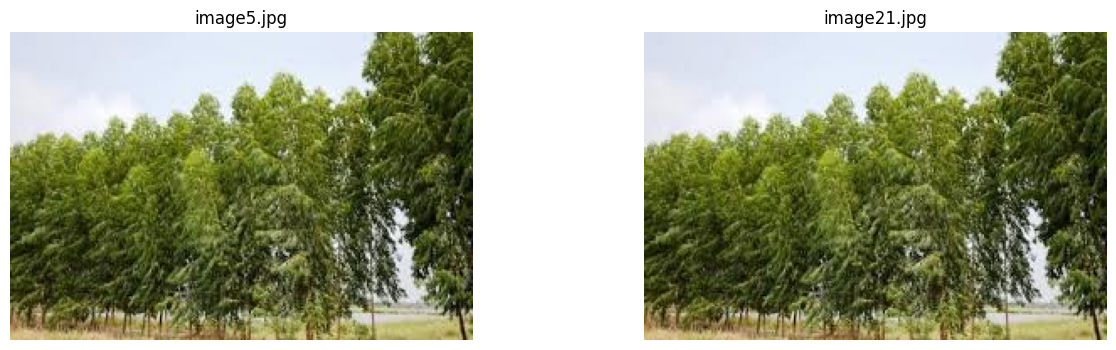

Duplicate set 3:


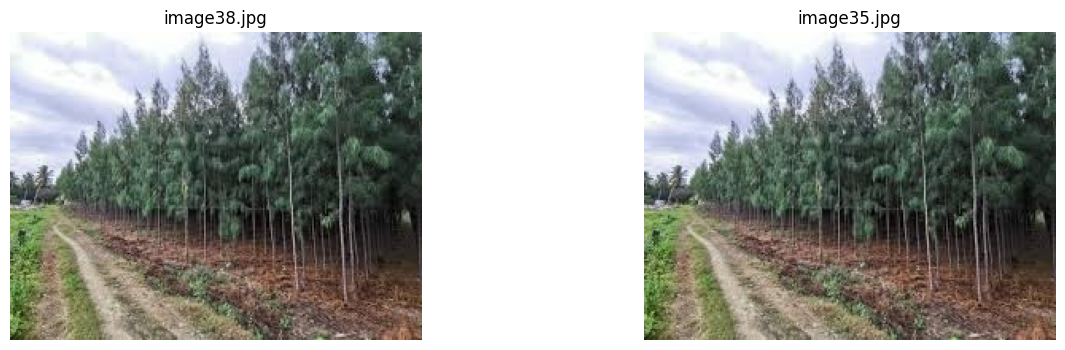

In [19]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [20]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [21]:
# Re-check to confirm duplicates removed
hashes = defaultdict(list)

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(Repo_path, class_dir)):
        img_path = os.path.join(Repo_path, class_dir, img_file)
        with open(img_path, 'rb') as f:
            file_hash = hashlib.md5(f.read()).hexdigest()
            hashes[file_hash].append(img_path)

duplicates = {h: files for h, files in hashes.items() if len(files) > 1}
print("🔁 Duplicates remaining:", len(duplicates))

🔁 Duplicates remaining: 0


In [22]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(Repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


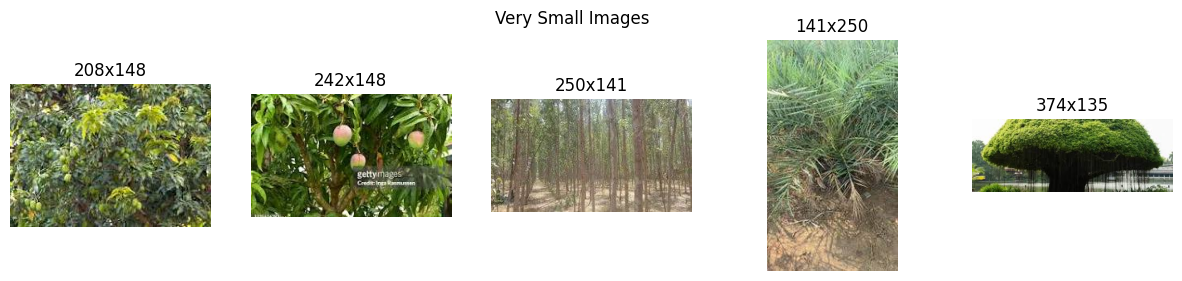

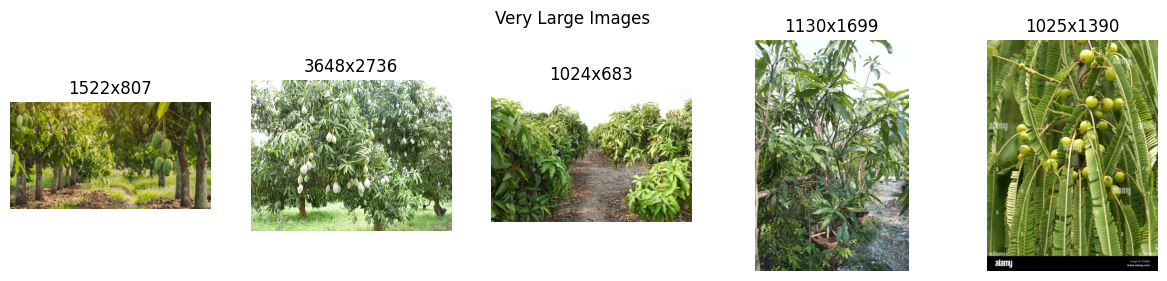

In [23]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [24]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [25]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(Repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    Repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    Repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


In [27]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         3,870 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,409 (16.09 MB)

 Trainable params: 167,838 (655.62 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [28]:
EPOCHS = 10

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.0515 - loss: 3.4494 - val_accuracy: 0.0903 - val_loss: 3.3780
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 435ms/step - accuracy: 0.0842 - loss: 3.3891 - val_accuracy: 0.0903 - val_loss: 3.3768
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 434ms/step - accuracy: 0.0937 - loss: 3.3866 - val_accuracy: 0.0903 - val_loss: 3.3756
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 456ms/step - accuracy: 0.0886 - loss: 3.3843 - val_accuracy: 0.0903 - val_loss: 3.3739
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 433ms/step - accuracy: 0.0805 - loss: 3.3856 - val_accuracy: 0.0903 - val_loss: 3.3729
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 461ms/step - accuracy: 0.0872 - loss: 3.3827 - val_accuracy: 0.0903 - val_loss: 3.3782
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 457ms/step - accuracy: 0.0826 - loss: 3.3765 - val_accuracy: 0.0903 - val_loss: 3.3701
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 430ms/step - accuracy: 0.0960 - loss: 3.3727 - val_accurac

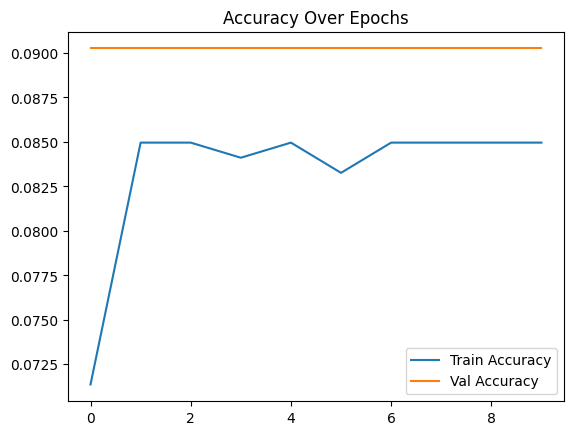

In [29]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    Repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    Repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 10
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 30 classes.
Found 277 images belonging to 30 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 673ms/step - accuracy: 0.0548 - loss: 3.9460 - val_accuracy: 0.1011 - val_loss: 3.2473
Epoch 2/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 450ms/step - accuracy: 0.1013 - loss: 3.2497 - val_accuracy: 0.1661 - val_loss: 2.9642
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 498ms/step - accuracy: 0.1514 - loss: 3.0142 - val_accuracy: 0.1661 - val_loss: 2.9327
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 433ms/step - accuracy: 0.1541 - loss: 2.9686 - val_accuracy: 0.2094 - val_loss: 2.8442
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.1702 - loss: 2.9875 - val_accuracy: 0.2166 - val_loss: 2.7975
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 431ms/step - accuracy: 0.2054 - loss: 2.8302 - val_accuracy: 0.2347 - val_loss: 2.6010
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 435ms/step - accuracy: 0.2527 - loss: 2.7350 - val_accuracy: 0.2563 - val_loss: 2.5974
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.2554 - loss: 2.6434 - val_accu

✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


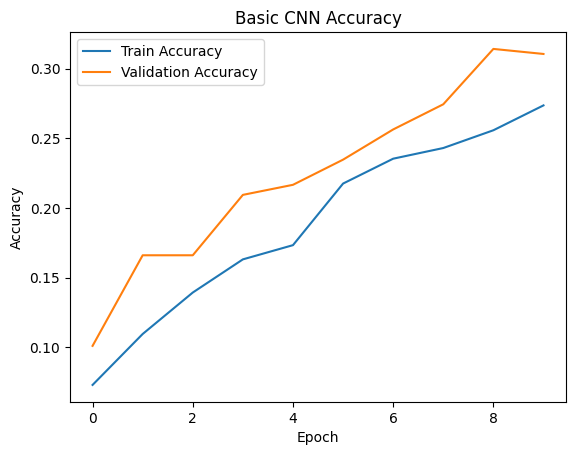

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')  # For 30 classes
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_generator, validation_data=val_generator, epochs=25)

model.save("improved_cnn_model.h5")

Epoch 1/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 588ms/step - accuracy: 0.0863 - loss: 5.1871 - val_accuracy: 0.0289 - val_loss: 8.8894
Epoch 2/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 16s 437ms/step - accuracy: 0.1437 - loss: 3.1578 - val_accuracy: 0.0289 - val_loss: 16.1212
Epoch 3/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 449ms/step - accuracy: 0.1404 - loss: 3.1487 - val_accuracy: 0.0289 - val_loss: 17.1651
Epoch 4/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 467ms/step - accuracy: 0.1323 - loss: 3.1953 - val_accuracy: 0.0325 - val_loss: 16.6610
Epoch 5/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 447ms/step - accuracy: 0.1510 - loss: 3.0616 - val_accuracy: 0.0289 - val_loss: 24.6010
Epoch 6/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 506ms/step - accuracy: 0.1424 - loss: 3.0349 - val_accuracy: 0.0289 - val_loss: 24.2794
Epoch 7/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 508ms/step - accuracy: 0.1799 - loss: 2.9903 - val_accuracy: 0.1119 - val_loss: 20.8250
Epoch 8/25
37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 475ms/step - accuracy: 0.1570 - loss: 3.0042 - va

Model 'improved_cnn_model.h5' loaded successfully.
Loaded class names: ['amla', 'asopalav', 'babul', 'bamboo', 'banyan', 'bili', 'cactus', 'champa', 'coconut', 'garmalo', 'gulmohor', 'gunda', 'jamun', 'kanchan', 'kesudo', 'khajur', 'mango', 'motichanoti', 'neem', 'nilgiri', 'other', 'pilikaren', 'pipal', 'saptaparni', 'shirish', 'simlo', 'sitafal', 'sonmahor', 'sugarcane', 'vad']


Saving images (20).jpg to images (20).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step


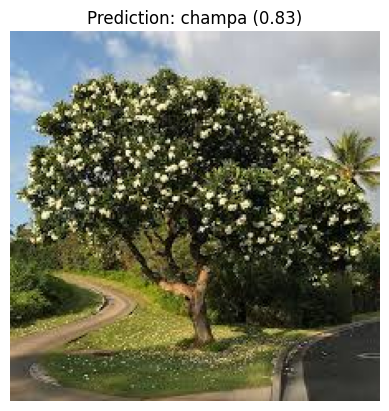

Predicted Species: champa
Confidence: 0.83


In [37]:
from google.colab import files
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the trained model
# Make sure the model file exists in your Colab environment
model_path = 'improved_cnn_model.h5' # Or 'basic_cnn_tree_species.h5'
try:
    loaded_model = load_model(model_path)
    print(f"Model '{model_path}' loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the model file exists and the path is correct.")

# Assuming train_generator was defined in a previous cell and is available
# If not, you would need to recreate the class_names list based on your dataset directory structure.
if 'train_generator' in locals():
    class_names = list(train_generator.class_indices.keys())
    print(f"Loaded class names: {class_names}")
else:
    # Fallback if train_generator is not available
    # You would need to define dataset_path
    if 'Repo_path' in locals() and os.path.exists(Repo_path): # Corrected to use Repo_path
        class_names = sorted(os.listdir(Repo_path))
        print(f"Generated class names from directory: {class_names}")
    else:
        class_names = []
        print("Could not determine class names. Please run the data loading and preprocessing cells.")


# Function to preprocess and predict on an uploaded image
def predict_uploaded_image(model, class_names, img_height, img_width):
    uploaded = files.upload()

    for fn in uploaded.keys():
        # Read the image
        img_path = fn
        try:
            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
            img_array /= 255.0  # Rescale the image

            # Make prediction
            predictions = model.predict(img_array)
            predicted_class_index = np.argmax(predictions)
            predicted_class_name = class_names[predicted_class_index]
            confidence = predictions[0][predicted_class_index]

            # Display the image and prediction
            plt.imshow(img)
            plt.title(f"Prediction: {predicted_class_name} ({confidence:.2f})")
            plt.axis('off')
            plt.show()

            print(f"Predicted Species: {predicted_class_name}")
            print(f"Confidence: {confidence:.2f}")

        except Exception as e:
            print(f"Error processing image {fn}: {e}")

# Set image dimensions (should match the model's input size)
IMG_HEIGHT = 224
IMG_WIDTH = 224

# Call the prediction function (if model and class names are loaded)
if 'loaded_model' in locals() and 'class_names' in locals() and class_names:
    predict_uploaded_image(loaded_model, class_names, IMG_HEIGHT, IMG_WIDTH)
else:
    print("Model or class names not loaded. Cannot perform prediction.")